In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
RESULTS_PATH = "../results/"
DATA_PATH = "../data/"

# Acuracies

In [3]:
#proportions = ['1', '10% (5 +- 18)', '20% (9 +- 35)', '30% (13 +- 53)', '40% (17 +- 71)', '50% (22 +- 88)', '60% (26 +- 106)', '70% (31 +- 124)', '80% (35 +- 142)', '90% (39 +- 159)']
proportions = ['Single', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
x_pos = np.arange(len(proportions))
accuracies = [0.581390, 0.762853, 0.797300, 0.811683, 0.819126, 0.824015, 0.827426, 0.829591, 0.831311, 0.832210]
errors = [0.122183, 0.065940, 0.059471, 0.057582, 0.056741, 0.056621, 0.056768, 0.057052, 0.058252, 0.060523]

In [4]:
def autolabel(ax, rects,data):
    """
    Attach a text label above each bar displaying its height
    """
    for rect, text in zip(rects,data):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height/2, text,ha='center', va='center', fontsize=10)

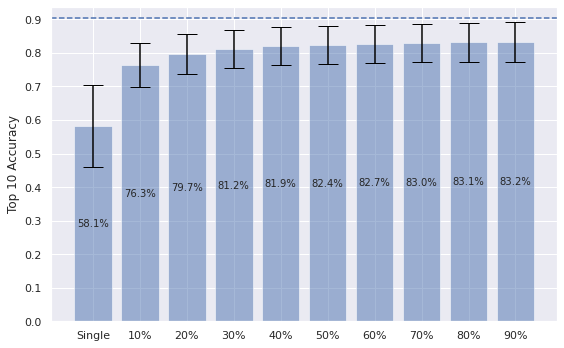

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x_pos, accuracies, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.axhline(y=0.904, linestyle='--')
ax.set_ylabel('Top 10 Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(proportions)
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.yaxis.grid(True)

autolabel(ax, rects1, ["%.1f%%" % (acc * 100) for acc in accuracies])

# Save the figure and show
fig.tight_layout()
fig.savefig(f'{RESULTS_PATH}few_shot_accuracies.pdf', format='pdf')
fig.show()

In [6]:
train_labels_df = pd.read_csv(os.path.join(DATA_PATH, "train_values_grouped.csv"))

/home/robot/anaconda3/envs/altlabs/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='output'>

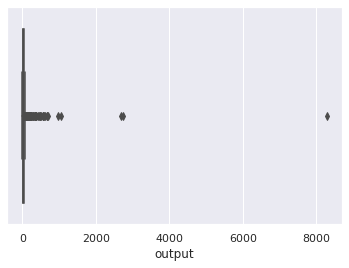

In [7]:
sns.boxplot(train_labels_df.groupby("output")["output"].count())

# Positions

In [8]:
positions_arr = np.load("../data/one_shot_positions.npy")

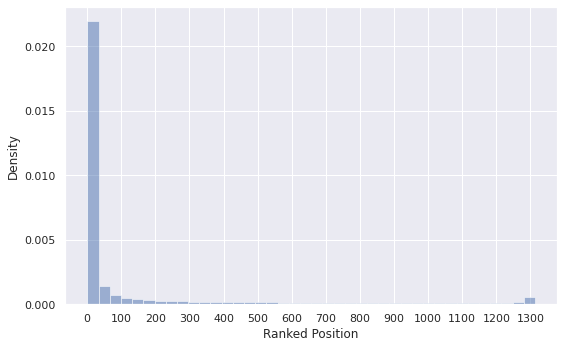

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(positions_arr+1, density=True, alpha=0.5, bins=40)
ax.set_ylabel('Density')
ax.set_xlabel('Ranked Position')
ax.set_xticks(np.arange(0, 1400, 100))
#ax.set_xticklabels(proportions)
#ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.yaxis.grid(True)

# Save the figure and show
fig.tight_layout()
fig.savefig(f'{RESULTS_PATH}one_shot_positions_histogram.pdf', format='pdf')
fig.show()

In [10]:
(positions_arr+1).mean()

140.1773392172775

In [11]:
np.median(positions_arr+1)

5.0

In [12]:
(positions_arr < 100).sum() / len(positions_arr)

0.7899210757157131

In [13]:
np.quantile(positions_arr+1, 0.9, interpolation="lower")

577

In [14]:
train_labels_df["output"].nunique()

1314

In [15]:
positions_arr.mean()

139.1773392172775

In [16]:
np.median(positions_arr)

4.0